# Metody inteligencji obliczeniowej - Sprawozdanie 3

# Aproksymacja funkcji

### Yuliya Zviarko, 02.04.25


# Wprowadzenie

Na kolejnych ƒáwiczeniach mieli≈õmy styczno≈õƒá z zagadnieniem **aproksymacji funkcji** - przybli≈ºania jednej funkcji za pomocƒÖ innej. Poznali≈õmy dla tego r√≥≈ºne metody, takie jak aproksymacja wielomianowa i trygonometryczna. Skupili≈õmy siƒô tak≈ºe na wykorzystaniu MLPRegressor do aproksymacji danych. Om√≥wili≈õmy miary jako≈õci aproksymacji, takie jak **MSE**, **RMSE**, **MAPE** oraz wsp√≥≈Çczynnik determinacji **$R^2$**


W ramach zada≈Ñ praktycznych trenowali≈õmy sieci neuronowe do aproksymacji r√≥≈ºnych funkcji i zbior√≥w danych. Badali≈õmy wp≈Çyw architektury sieci (liczba neuron√≥w, warstwy, funkcje aktywacji) na dok≈Çadno≈õƒá aproksymacji.


# Przebieg laboratorium

# Zadanie 1

W zadaniu pierwszym nale≈ºa≈Ço pobraƒá plik advertising.csv, kt√≥ry zawiera≈Ç dane na temat wydatk√≥w na reklamƒô telewizyjnƒÖ, radiowƒÖ i prasowƒÖ dla pojedynczego produktu oraz zwiƒÖzane z tym zyski ze sprzeda≈ºy. Zyski te mo≈ºna przedstawiƒá jako funkcjƒô zale≈ºno≈õci:

    $Z(w_{TV}, w_{radio}, w_{prasa}

Celem zadania by≈Ço zaproponowanie architektury sieci neuronowej, kt√≥ra dokona aproksymacji tej funkcji. Dodatkowo nale≈ºa≈Ço przeprowadziƒá ewaluacjƒô zaproponowanej sieci, por√≥wnujƒÖc wyniki (b≈ÇƒÖd ≈õredniokwadratowy, MSE) dla przynajmniej dw√≥ch r√≥≈ºnych struktur sieci, r√≥≈ºniƒÖcych siƒô liczbƒÖ neuron√≥w, oraz dla dw√≥ch r√≥≈ºnych funkcji aktywacji (ReLU i tanh).

In [2]:
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn import preprocessing
from sklearn.metrics import mean_squared_error
from sklearn.datasets import fetch_california_housing
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [7]:
# Wczytujemy i przygotujemy dane:
data_ad = pd.read_csv('Advertising.csv', sep = ',', header = None)
data_ad = data_ad.drop(0)
data_ad = data_ad.iloc[:,1:]
print(data_ad)

         1     2     3     4
1    230.1  37.8  69.2  22.1
2     44.5  39.3  45.1  10.4
3     17.2  45.9  69.3   9.3
4    151.5  41.3  58.5  18.5
5    180.8  10.8  58.4  12.9
..     ...   ...   ...   ...
196   38.2   3.7  13.8   7.6
197   94.2   4.9   8.1   9.7
198    177   9.3   6.4  12.8
199  283.6    42  66.2  25.5
200  232.1   8.6   8.7  13.4

[200 rows x 4 columns]


In [8]:
X = data_ad.iloc[:, 0:3].to_numpy().astype(float)
y = data_ad.iloc[:, 3].to_numpy().astype(float)

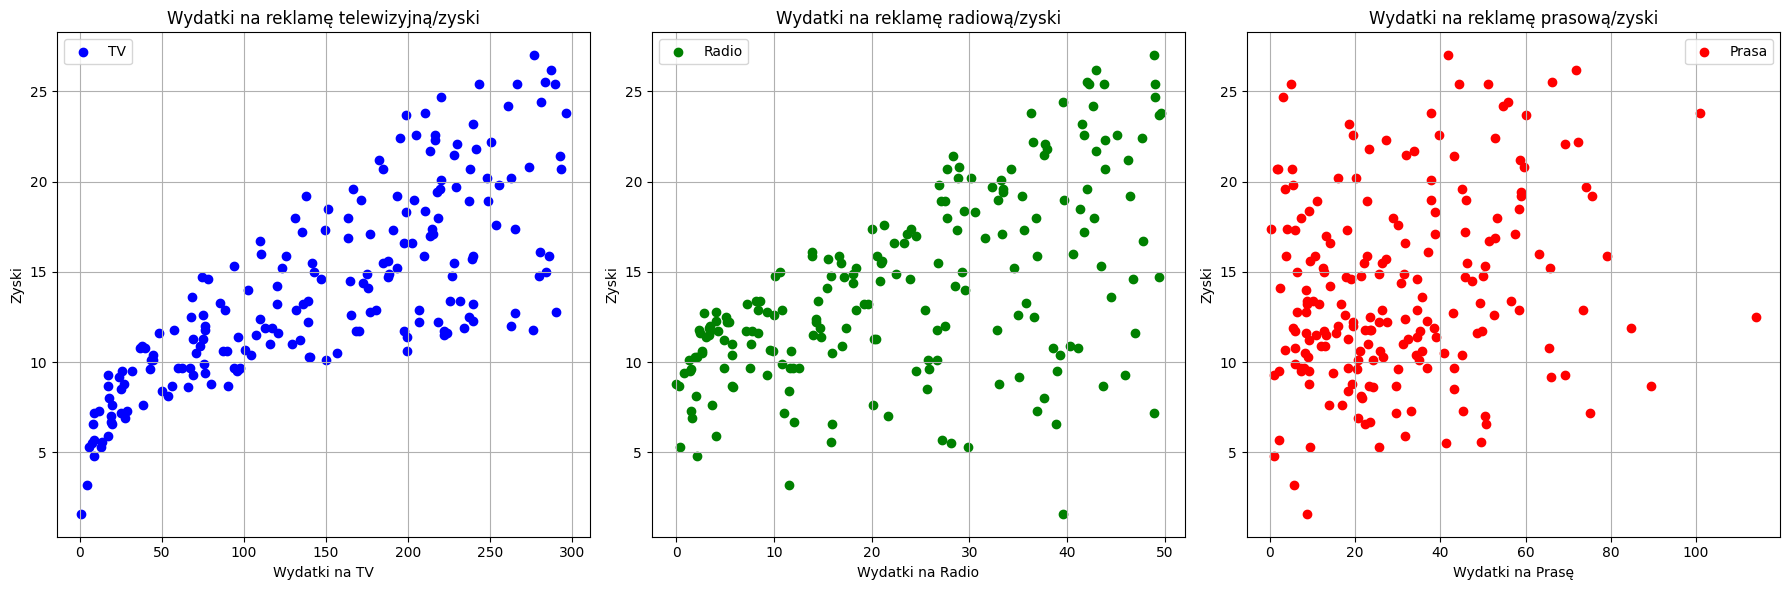

In [33]:
# Wizualizacja danych wej≈õciowych
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

axes[0].scatter(X[:, 0], y, color='blue', label='TV')
axes[0].set_title('Wydatki na reklamƒô telewizyjnƒÖ/zyski')
axes[0].set_xlabel('Wydatki na TV')
axes[0].set_ylabel('Zyski')
axes[0].grid(True)
axes[0].legend()

axes[1].scatter(X[:, 1], y, color='green', label='Radio')
axes[1].set_title('Wydatki na reklamƒô radiowƒÖ/zyski')
axes[1].set_xlabel('Wydatki na Radio')
axes[1].set_ylabel('Zyski')
axes[1].grid(True)
axes[1].legend()

axes[2].scatter(X[:, 2], y, color='red', label='Prasa')
axes[2].set_title('Wydatki na reklamƒô prasowƒÖ/zyski')
axes[2].set_xlabel('Wydatki na Prasƒô')
axes[2].set_ylabel('Zyski')
axes[2].grid(True)
axes[2].legend()

plt.tight_layout()
# plt.show()

In [31]:
# Podzia≈Ç na zbi√≥r trenujƒÖcy a testowy
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Wybra≈Çam nastƒôpujƒÖce dwie struktury sieci oraz funkcje aktywacji.
structures = [(1,1), (20, 20), (100, 100, 100, 100, 100)]
activation_functions = ['relu', 'tanh']

# Wszystkie wyniki zostanƒÖ zapisane w 'results':
results = []

# Trening i walidacja modelu:
for structure in structures:
    for activation_function in activation_functions:
        network = MLPRegressor(solver='adam', hidden_layer_sizes=structure, max_iter=2000, tol=0.001, activation=activation_function)
        network.fit(X_train, y_train)
        predicted = network.predict(X_test)

        MSE_network = mean_squared_error(y_test, predicted)
        score_network = network.score(X_test, y_test)

        # Zapisujemy otrzymany wynki
        results.append((activation_function, structure, MSE_network, score_network))
        print(f"funkcja Aktywacji: {activation_function}, struktura: {structure} ----> MSE: {MSE_network:.4f}, Score: {score_network:.4f}")


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2000) reached and the optimization hasn't converged yet.
  warnings.warn(


funkcja Aktywacji: relu, struktura: (1, 1) ----> MSE: 142.8562, Score: -3.5260


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2000) reached and the optimization hasn't converged yet.
  warnings.warn(


funkcja Aktywacji: tanh, struktura: (1, 1) ----> MSE: 123.6780, Score: -2.9184
funkcja Aktywacji: relu, struktura: (20, 20) ----> MSE: 27.5831, Score: 0.1261
funkcja Aktywacji: tanh, struktura: (20, 20) ----> MSE: 1.9144, Score: 0.9393
funkcja Aktywacji: relu, struktura: (100, 100, 100, 100, 100) ----> MSE: 3.5360, Score: 0.8880
funkcja Aktywacji: tanh, struktura: (100, 100, 100, 100, 100) ----> MSE: 0.8351, Score: 0.9735


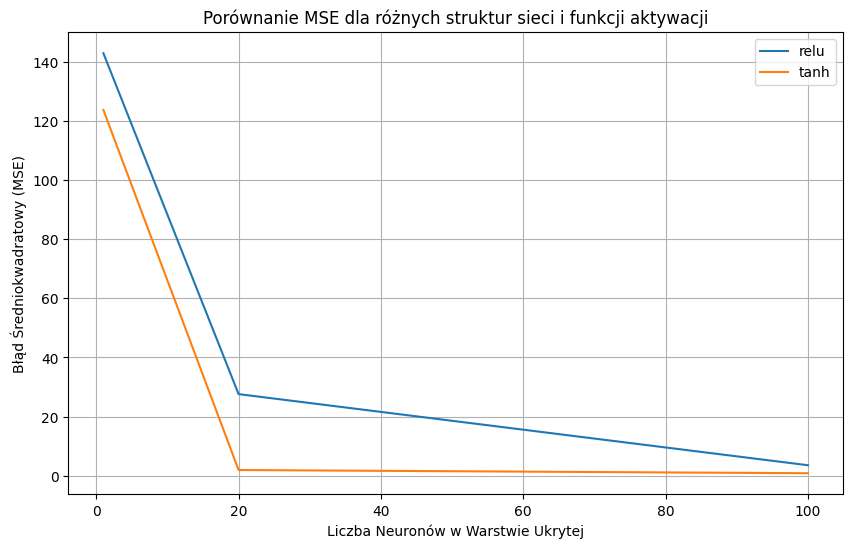

In [32]:
# Dla lepszego zrozumienia wynik√≥w - narysujmy wykresy por√≥wnawcze MSE dla r√≥≈ºnych struktur i funkcji aktywacji:
mse_values = np.array([[result[2] for result in results if result[0] == activation_function and result[1] == structure]
                       for structure in structures for activation_function in activation_functions])

fig, ax = plt.subplots(figsize=(10, 6))
for i, activation_function in enumerate(activation_functions):
    ax.plot([structure[0] for structure in structures], mse_values[i::len(activation_functions)], label=activation_function)

ax.set_xlabel('Liczba Neuron√≥w w Warstwie Ukrytej')
ax.set_ylabel('B≈ÇƒÖd ≈öredniokwadratowy (MSE)')
ax.set_title('Por√≥wnanie MSE dla r√≥≈ºnych struktur sieci i funkcji aktywacji')
ax.legend()
plt.grid(True)
plt.show()

AnalizujƒÖc otrzymane wyniki, widaƒá, ≈ºe najlepszƒÖ konfiguracjƒÖ okaza≈Ça siƒô sieƒá o strukturze (100, 100, 100, 100, 100) z funkcjƒÖ aktywacji **tanh**, kt√≥ra osiƒÖgnƒô≈Ça najni≈ºszƒÖ warto≈õƒá b≈Çƒôdu ≈õredniokwadratowego (MSE = 0.8351) oraz najwy≈ºszy wsp√≥≈Çczynnik dopasowania (Score = 0.9735).
üòÑ

Eksperyment ze zmiennƒÖ liczbƒÖ neuron√≥w wyra≈∫nie pokazuje, ≈ºe wiƒôksza liczba neuron√≥w w warstwach ukrytych znaczƒÖco poprawia zdolno≈õƒá sieci do modelowania danych.

Por√≥wnanie warto≈õci MSE dla r√≥≈ºnych struktur sieci i funkcji aktywacji wskazuje, ≈ºe **tanh** wykazuje lepszƒÖ stabilno≈õƒá, osiƒÖgajƒÖc warto≈õci MSE zbli≈ºone do zera.

Najprostsze modele (1,1), jak pokazujƒÖ wyniki test√≥w, nie nadajƒÖ siƒô do tego zadania, poniewa≈º osiƒÖgnƒô≈Çy bardzo wysokie warto≈õci MSE i niskie Score.

A wiƒôc kluczowe jest zastosowanie **odpowiedniej liczby neuron√≥w** oraz wyb√≥r **stabilnych funkcji aktywacji**.

# Zadanie 2

W drugim zadaniu nale≈ºa≈Ço utworzyƒá sieƒá neuronowƒÖ (najlepiej z jednƒÖ warstwƒÖ ukrytƒÖ) do aproksymacji funkcji **sinus'a** w przedziale od $-2œÄ$ do $2œÄ$, wykorzystujƒÖc **tanh** jako funkcjƒô aktywacji.

Na koniec nale≈ºa≈Ço zaprezentowaƒá zar√≥wno funkcjƒô aproksymowanƒÖ, jak i aproksymujƒÖcƒÖ.
Dodatkowo, korzystajƒÖc z dostƒôpu do wag i bias√≥w

    **(network.coefs_ oraz network.intercepts_)**,

nale≈ºa≈Ço zapisaƒá wz√≥r funkcji aproksymujƒÖcej.

Wz√≥r funkcji aproksymujƒÖca:
Neuron 1: f(x) = tanh(0.2580 * x + 1.1216)


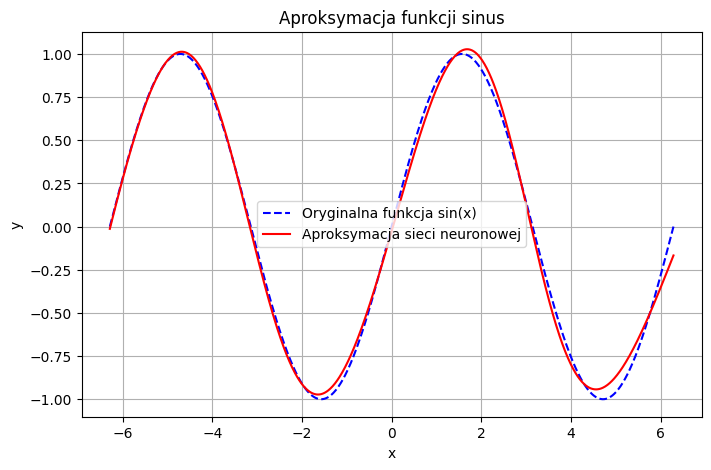

In [44]:
# Tworzenie zbioru treningowego (Na poczƒÖtku definiujemy przedzial a potem funckje sinus'a)
X_train = np.linspace(-2 * np.pi, 2 * np.pi, 100).reshape(-1, 1)
y_train = np.sin(X_train).ravel()

# Definicja i trenowanie sieci
network = MLPRegressor(solver="lbfgs", hidden_layer_sizes=(4), max_iter=2000, tol=0.001, activation='tanh')
network.fit(X_train, y_train)

# Tworzenie zbioru testowego
X_test = np.linspace(-2 * np.pi, 2 * np.pi, 1000).reshape(-1, 1)
y_test = np.sin(X_test).ravel()
# Aproksymowane warto≈õci
y_test_approx = network.predict(X_test)


print("Wz√≥r funkcji aproksymujƒÖcej:")
for i in range(len(network.coefs_[0])):
    print(f"Neuron {i+1}: f(x) = tanh({network.coefs_[0][i][0]:.4f} * x + {network.intercepts_[0][i]:.4f})")

plt.figure(figsize=(8, 5))
plt.plot(X_test, y_test, label='Oryginalna funkcja sin(x)', color='blue', linestyle='dashed')
plt.plot(X_test, y_test_approx, label='Aproksymacja sieci neuronowej', color='red')
plt.xlabel("x")
plt.ylabel("y")
plt.title("Aproksymacja funkcji sinus")
plt.legend()
plt.grid()
plt.show()

Sieƒá doskonale aproksymuje funkcjƒô sinus w zadanym przedziale metodƒÖ lbfgs, co jest wyra≈∫nie widoczne na przedstawionym wykresie.

Zastosowana funkcja aktywacji tanh ponownie sprawdzi≈Ça siƒô bardzo dobrze, zapewniajƒÖc stabilno≈õƒá i dok≈Çadno≈õƒá aproksymacji.

Wykorzystanie tylko 4 neuron√≥w w jednej warstwie ukrytej okaza≈Ço siƒô wystarczajƒÖce do wiernego odwzorowania funkcji sinus. Choƒá zwiƒôkszenie liczby neuron√≥w mog≈Çoby jeszcze poprawiƒá dok≈Çadno≈õƒá modelu, mog≈Çoby r√≥wnie≈º prowadziƒá do ryzyka przeuczenia.

Otrzymany wz√≥r funkcji aproksymujƒÖcej wskazuje na dobrze dobranƒÖ warto≈õƒá wagi w ‚âà 0.3:

$f(x) = tanh(0.2580 * x + 1.1216).$

# Zadanie 3

W tym zadaniu mieli≈õmy styczno≈õƒá z rzeczywistym zbiorem danych medycznych Diabetes z biblioteki **sklearn.datasets**. Celem by≈Ço przewidywanie stopnia zaawansowania cukrzycy na podstawie zestawu cech opisujƒÖcych pacjenta.



Nale≈ºa≈Ço przeskalowaƒá dane do jednej skali oraz podzieliƒá je na zbi√≥r uczƒÖcy i testowy. Nastƒôpnie nale≈ºa≈Ço zaproponowaƒá co najmniej 5 r√≥≈ºnych architektur sieci neuronowych, dla ka≈ºdej z nich obliczyƒá metryki oceny jako≈õci modelu: MSE, MAPE i $R^2$.

Dla najlepszego modelu nale≈ºa≈Ço wykonaƒá wykres por√≥wnujƒÖcy warto≈õci rzeczywiste (o≈õ X) i przewidywane (o≈õ Y). W idealnym przypadku punkty powinny uk≈Çadaƒá siƒô wzd≈Çu≈º prostej $y=x$, co wskazywa≈Çoby na doskona≈ÇƒÖ zgodno≈õƒá predykcji z rzeczywisto≈õciƒÖ.

Na koniec nale≈ºa≈Ço zastanowiƒá siƒô nad pytaniem:

"Jak architektura sieci wp≈Çywa na jako≈õƒá aproksymacji i jaka jest najmniejsza sieƒá, kt√≥ra daje zadowalajƒÖce wyniki?"

/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


(10, 10, 10)
MSE: 2690.8976
MAPE: 0.3642
R^2: 0.4921


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


(20, 20, 20, 20, 20)
MSE: 3219.0279
MAPE: 0.4099
R^2: 0.3924


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


(50, 50, 50, 50, 50)
MSE: 8135.8122
MAPE: 0.6101
R^2: -0.5356
(100, 100, 100, 100, 100)
MSE: 4449.7120
MAPE: 0.4372
R^2: 0.1601
(300, 300, 300, 300, 300)
MSE: 4075.1938
MAPE: 0.4388
R^2: 0.2308


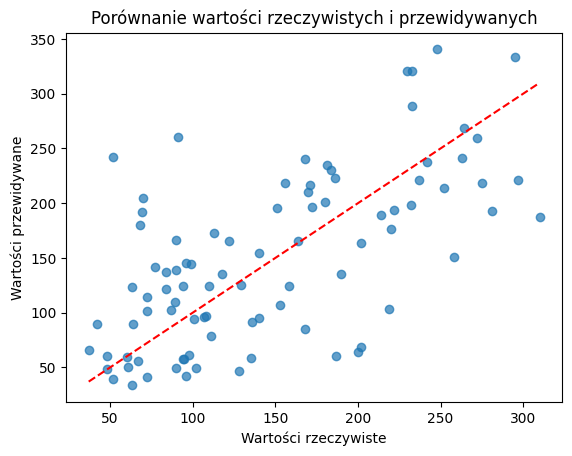

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error, r2_score

# Wczytanie zbioru danych Diabetes, ich normalizacja oraz podzila na zb√≥r testujƒÖcy a trenujƒÖcy
diabetes = load_diabetes()
X, y = diabetes.data, diabetes.target
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Wybra≈Çam nastƒôpujƒÖce architektury sieci:
structure = [(10,10,10), (20,20,20,20,20), (50,50,50,50,50), (100,100,100,100,100), (300,300,300,300,300)]

for structure in structure:
  # Tworzenie i trenowanie modelu
  mlp = MLPRegressor(hidden_layer_sizes=structure, activation='relu', solver='adam', max_iter=1000, random_state=42)
  mlp.fit(X_train, y_train)
  y_pred = mlp.predict(X_test)

  # Obliczenie MSE, MAPE i ùëÖ^2
  mse = mean_squared_error(y_test, y_pred)
  mape = mean_absolute_percentage_error(y_test, y_pred)
  r2 = r2_score(y_test, y_pred)

  print(structure)
  print(f"MSE: {mse:.4f}")
  print(f"MAPE: {mape:.4f}")
  print(f"R^2: {r2:.4f}")

plt.scatter(y_test, y_pred, alpha=0.7)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')  # Linia y=x
plt.xlabel('Warto≈õci rzeczywiste')
plt.ylabel('Warto≈õci przewidywane')
plt.title('Por√≥wnanie warto≈õci rzeczywistych i przewidywanych')
plt.show()

Architektura sieci neuronowej ma wp≈Çyw na jako≈õƒá predykcji:

Najlepsze wyniki uzyska≈Ç model o najmniejszej architekturze (10,10,10), dla kt√≥rego MSE wynios≈Ço $2690.90$, MAPE $0.3642$, a R¬≤ $0.4921$. Do tego wykres por√≥wnujƒÖcy warto≈õci rzeczywiste i przewidywane pokazuje, ≈ºe sieƒá generuje predykcje do≈õƒá bliskie linii $y=x$.


üê§ üßè

Bardziej z≈Ço≈ºone modele niekoniecznie dajƒÖ lepsze wyniki:

Sieci o wiƒôkszej liczbie neuron√≥w, takie jak (50,50,50,50,50) czy (100,100,100,100,100), osiƒÖgnƒô≈Çy znacznie wy≈ºsze b≈Çƒôdy i ni≈ºsze R¬≤, mo≈ºe w tym le≈ºaƒá zwyk≈Çy problem przeuczenia siƒô. Najwiƒôksza sieƒá (300,300,300,300,300) r√≥wnie≈º nie poprawi≈Ça wynik√≥w, co pokazuje, ≈ºe dodawanie kolejnych warstw nie zawsze prowadzi do lepszej aproksymacji.

# Zadanie 4

BazujƒÖc siƒô na powy≈ºszym zbiorze danych, dla wybranych struktur sieci (np. najlepszej otrzymanej sieci), nale≈ºa≈Ço wykonaƒá wykresy zale≈ºno≈õci ilo≈õci wykonanych przez sieƒá epok oraz dw√≥ch wybranych metryk. Uzyskane wyniki trzeba przeanalizowaƒá we wnioskach.


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron

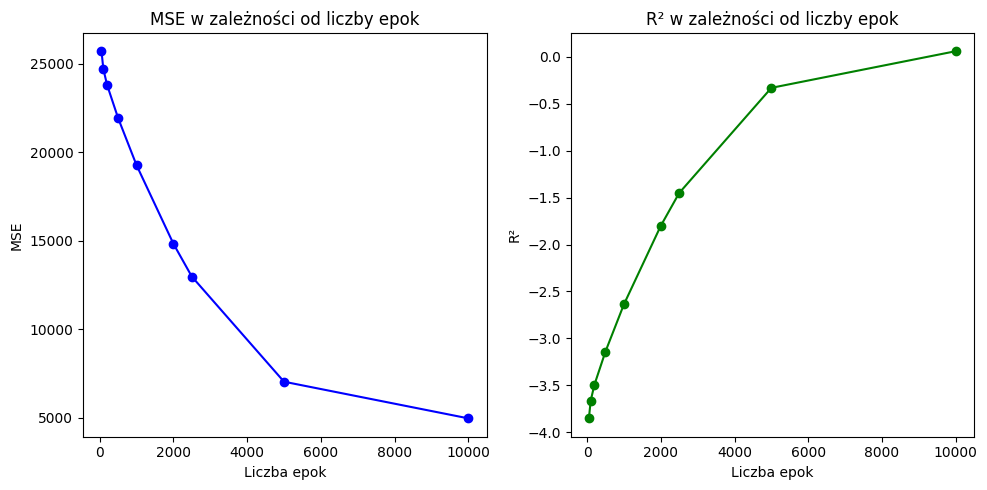

In [5]:
struct = (10,10,10) # najlepsza struktura z zadania trzeciego

# Lista epok do testowania
epochs = [50, 100, 200, 500, 1000, 2000, 2500, 5000, 10000]
mse_values = []
r2_values = []

# Trening modelu dla r√≥≈ºnych liczby epok
for epoch in epochs:
    mlp = MLPRegressor(hidden_layer_sizes=struct, activation='tanh', solver='adam',
                       max_iter=epoch, random_state=42)
    mlp.fit(X_train, y_train)
    y_pred = mlp.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    mse_values.append(mse)
    r2_values.append(r2)



# MSE/liczba epok
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(epochs, mse_values, marker='o', linestyle='-', color='b')
plt.xlabel('Liczba epok')
plt.ylabel('MSE')
plt.title('MSE w zale≈ºno≈õci od liczby epok')

# R¬≤/liczba epok
plt.subplot(1, 2, 2)
plt.plot(epochs, r2_values, marker='o', linestyle='-', color='g')
plt.xlabel('Liczba epok')
plt.ylabel('R¬≤')
plt.title('R¬≤ w zale≈ºno≈õci od liczby epok')
plt.tight_layout()
plt.show()

AnalizujƒÖc wykres, zauwa≈ºamy, ≈ºe poczƒÖtkowo R¬≤ szybko ro≈õnie, a MSE maleje. Po oko≈Ço 4000 epok warto≈õci te stabilizujƒÖ siƒô, a dalszy wzrost liczby epok nie przynosi ju≈º nag≈Çych zmian. Prawdopodobnie w tym momencie dochodzi do przeuczenia. Dla eksperymentu powt√≥rzy≈Çam powy≈ºsze kroki, dodajƒÖc learning_rate_init=0.01.

/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron

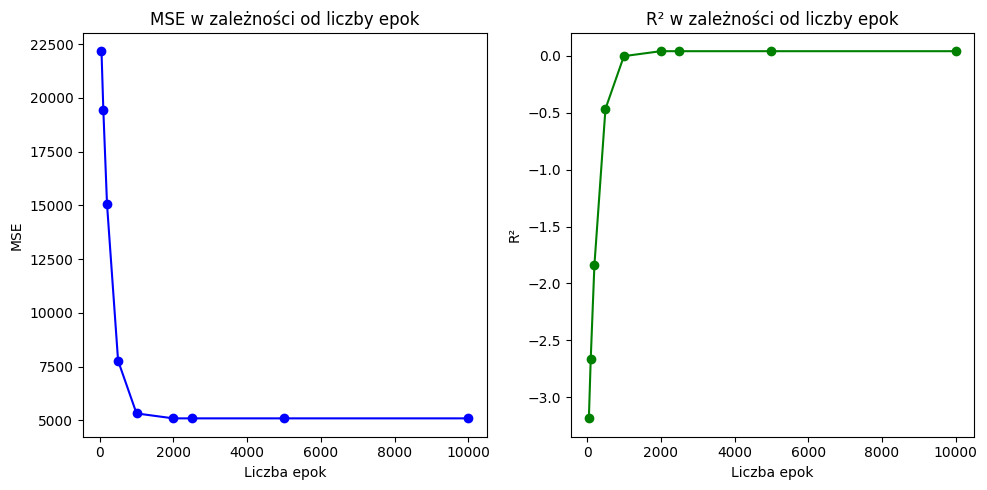

In [7]:
struct = (10,10,10)
epochs = [50, 100, 200, 500, 1000, 2000, 2500, 5000, 10000]
mse_values = []
r2_values = []

for epoch in epochs:
    mlp = MLPRegressor(hidden_layer_sizes=struct, activation='tanh', solver='adam',
                       max_iter=epoch, random_state=42, learning_rate_init=0.01)
    mlp.fit(X_train, y_train)
    y_pred = mlp.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    mse_values.append(mse)
    r2_values.append(r2)

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(epochs, mse_values, marker='o', linestyle='-', color='b')
plt.xlabel('Liczba epok')
plt.ylabel('MSE')
plt.title('MSE w zale≈ºno≈õci od liczby epok')
plt.subplot(1, 2, 2)
plt.plot(epochs, r2_values, marker='o', linestyle='-', color='g')
plt.xlabel('Liczba epok')
plt.ylabel('R¬≤')
plt.title('R¬≤ w zale≈ºno≈õci od liczby epok')
plt.tight_layout()
plt.show()

Na tym przyk≈Çadzie widaƒá wyra≈∫niej, do czego prowadzi zbyt du≈ºa warto≈õƒá tego parametru. Chocia≈º sieƒá nauczy≈Ça siƒô w mniejszej ilo≈õci epok, szybko nastƒÖpi≈Ço przeuczenie i wska≈∫niki nie ustabilizowa≈Çy siƒô.